Test VAE model on random frame of random file in `record`

In [1]:
import numpy as np
import os
import json
import tensorflow as tf
import random
import cv2
from vae.vae import ConvVAE, reset_graph
import matplotlib.animation as animation

In [2]:
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [8]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU

DATA_DIR = "record_seg"#"record_seg"
model_path_name = "tf_vae"#"tf_vae_seg"
model_path_name2 = "tf_vae"
z_size=64#64#32

vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, 'vae_noseg.json'))

vae2 = ConvVAE(z_size=z_size,
               batch_size=1,
               is_training=False,
               reuse=False,
               gpu_mode=False)

vae2.load_json(os.path.join(model_path_name2, 'vae_1k.json'))


INFO:tensorflow:Model using cpu.
INFO:tensorflow:Model using cpu.


In [9]:
filelist = os.listdir(DATA_DIR)

In [49]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
#obs = np.load(os.path.join(DATA_DIR, filelist[5]))["obs"]
#seg = np.load(os.path.join(DATA_DIR, filelist[5]))["seg"]
obs = obs.astype(np.float32)/255
#seg = seg.astype(np.float32)
#obs.shape

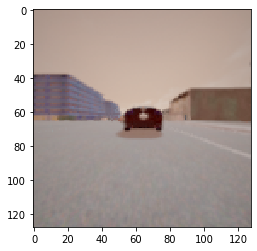

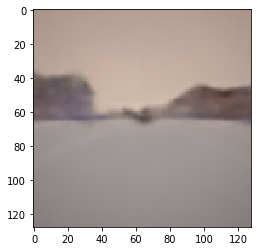

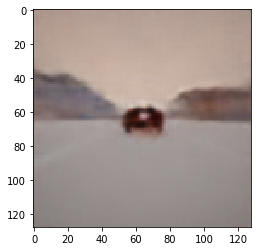

In [52]:
#frame = random.choice(obs).reshape(1, 64, 64, 3)
frame = random.choice(obs).reshape(1, 128, 128, 3)
#frame = random.choice(obs).reshape(1, 128, 128, 3)
#frame = obs[50].reshape(1,128,128,3)
#frame_seg = seg[50]
batch_z = vae.encode(frame)
batch_z2 = vae2.encode(frame)
#print(batch_z[0]) # print out sampled z
#print(batch_z.shape)
b_z = np.copy(batch_z)
reconstruct = vae.decode(batch_z)
reconstruct2 = vae2.decode(batch_z2)
#plt.imshow(batch_z)
#plt.show()
# show reconstruction
plt.imshow(frame[0])
plt.show()
#
plt.imshow(reconstruct2[0])
plt.show()
#plt.imshow(frame_seg)
#plt.show()

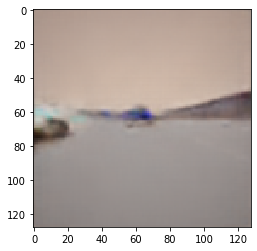

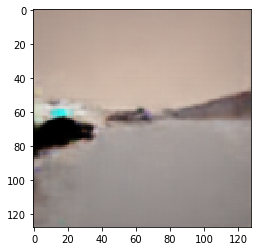

In [172]:
# show reconstruction
#plt.imshow(reconstruct[0])
#plt.show()
#48-50 seem to affect the car
b_z = np.copy(batch_z)
#for i in range(61,62):
#    b_z[0][i] += -4
#b_z[0][54] += 3 
b_z[0][61] += -6
#b_z[0][60] += 4 #Controls the car on the left side of the road
reconstruct2 = vae.decode(b_z)
plt.imshow(reconstruct[0])
plt.show()
plt.imshow(reconstruct2[0])
plt.show()